# **Projeto 4 introdução a redes neurais - Redes Recorrentes**

-------------------------------------------------------------------------------------------------------------

## Objetivo: 

Classificar séries temporais, onde o modelo recebe uma janela de dados e identifica sua categoria com base nos padrões observados. O objetivo escolhido para o projeto será é classificar o estado dos olhos (abertos ou fechados) com base nos sinais de EEG.

## Dataset

O dataset usado é o **EEG Eye State** que contém gravações de eletroencefalogramas (EEG) de sujeitos enquanto eles estavam com os olhos fechados ou abertos. A tarefa é classificar o estado dos olhos (abertos ou fechados) com base nos sinais de EEG.

## Importação das bibliotecas necessárias

In [1]:
import pandas as pd
from scipy.io import arff
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt

2025-02-04 18:49:16.864336: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-04 18:49:16.873447: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-04 18:49:16.885563: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-04 18:49:16.889375: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-04 18:49:16.897239: I tensorflow/core/platform/cpu_feature_guar

## Preparação dos dados

#### 1. Load do Dataset  
- O arquivo **EEG Eye State.arff** foi carregado a partir do diretório do projeto utilizando a função `arff.loadarff()` do SciPy.  
- O dataset contém **14 atributos numéricos** e uma variável alvo indicando o estado dos olhos (abertos ou fechados).  

#### 2. Separação dos Conjuntos  
- Os dados foram divididos em **treinamento (80%)** e **teste (20%)** usando a função `train_test_split()` do Scikit-learn.  
- Distribuição final dos dados:  
  - **Treino:** 1.400 amostras  
  - **Teste:** 350 amostras  

#### 3. Normalização e Formatação dos Dados  
- Os atributos de entrada foram convertidos para **float32** e normalizados, garantindo que os valores numéricos estejam no formato adequado para o treinamento.  
- A variável alvo foi convertida para uma **representação categórica** (com classes 0 e 1).  
- Os dados de entrada foram remodelados para o formato adequado ao modelo **LSTM**, com uma **dimensão adicional** para representar os **tempos** da série temporal.

#### 4. Visualização dos Dados  
- Foram exibidos **5 exemplos do conjunto de treino** com seus respectivos rótulos (0 ou 1), permitindo uma verificação visual dos padrões nas séries temporais antes do treinamento.


In [2]:
# Carregar o dataset EEG Eye State do arquivo ARFF
data, _ = arff.loadarff('./EEG Eye State.arff')  
df = pd.DataFrame(data)

# Visualizar as primeiras linhas para entender o formato
print(df.head())

       AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        P8       T8      FC6       F4       F8      AF4 eyeDetection  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85         b'0'  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10         b'0'  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23         b'0'  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41         b'0'  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46         b'0'  


Tamanho do treino: (11984, 14), (11984, 2)
Tamanho do teste: (2996, 14), (2996, 2)


Text(0.5, 0.98, 'Exemplos do EEG Eye State')

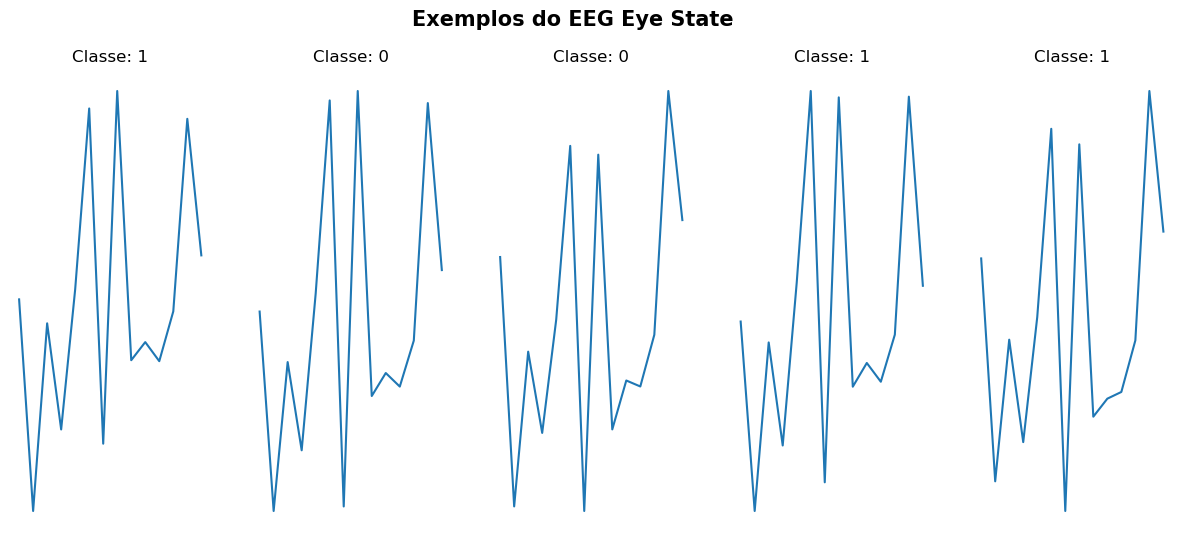

In [3]:
# Definir as variáveis de entrada (X) e as variáveis alvo (y)
X = df.iloc[:, :-1].values  # Todos os dados, exceto a última coluna (classe)
y = df.iloc[:, -1].values   # A última coluna é a classe (0 ou 1)

# Normalizar os dados para o formato adequado
X = X.astype(np.float32)

# Convertendo a variável alvo para categórica (0 ou 1)
y = to_categorical(y, num_classes=2)

# Dividir os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2)

# Exibir os tamanhos dos conjuntos
print(f"Tamanho do treino: {X_treino.shape}, {y_treino.shape}")
print(f"Tamanho do teste: {X_teste.shape}, {y_teste.shape}")

# Reshape para adequar à entrada de um modelo LSTM 
X_treino = X_treino.reshape((X_treino.shape[0], X_treino.shape[1], 1))
X_teste = X_teste.reshape((X_teste.shape[0], X_teste.shape[1], 1))

# Mostrar amostras
plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.plot(X_treino[i])
    plt.title(f"Classe: {np.argmax(y_treino[i])}")
    plt.axis('off')
plt.suptitle("Exemplos do EEG Eye State", fontsize=15, fontweight='bold')